In [1]:
#import libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder

from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.kernel_ridge import KernelRidge

In [2]:
#import dataset
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
#view dataset
train_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
#view dataset
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
#describe dataset
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
train_df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [7]:
train_df.dtypes[train_df.dtypes!='object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [8]:
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

<function matplotlib.pyplot.show(close=None, block=None)>

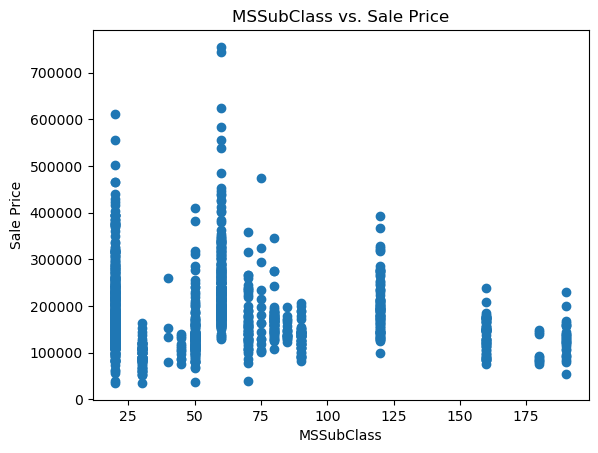

In [9]:
#MSSubClass vs saleprice scatterplot
plt.scatter(x='MSSubClass',y='SalePrice',data=train_df)
plt.xlabel('MSSubClass')
plt.ylabel('Sale Price')
plt.title('MSSubClass vs. Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

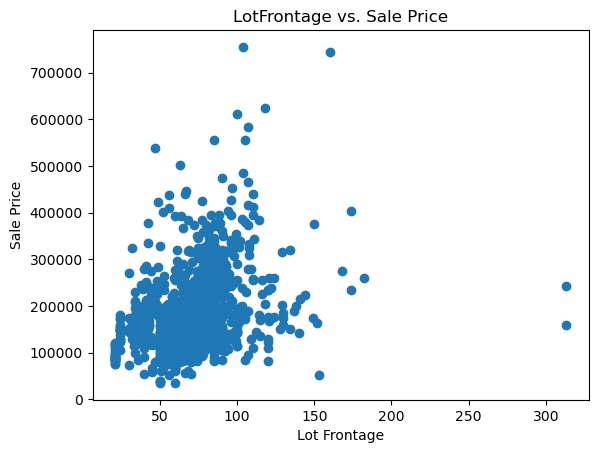

In [10]:
#LotFrontage vs saleprice scatter plot
plt.scatter(x='LotFrontage',y='SalePrice',data=train_df)
plt.xlabel('Lot Frontage')
plt.ylabel('Sale Price')
plt.title('LotFrontage vs. Sale Price')
plt.show

In [11]:
#check  what arethe outliers >300
train_df.query('LotFrontage>300')

#remove the outliers coz that can reduce accuracy of the data set (934,1298)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<function matplotlib.pyplot.show(close=None, block=None)>

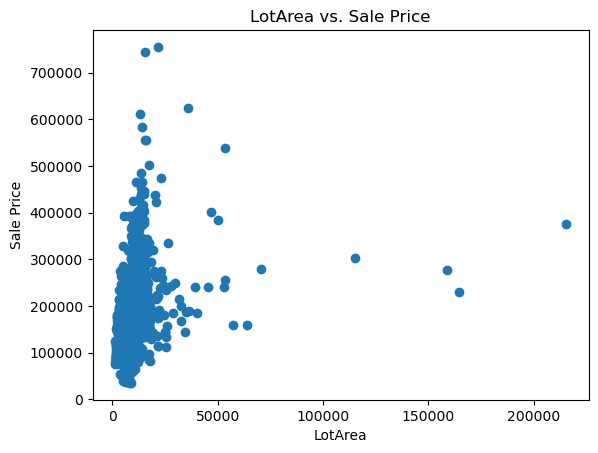

In [12]:
plt.scatter(x='LotArea',y='SalePrice',data=train_df)
plt.xlabel('LotArea')
plt.ylabel('Sale Price')
plt.title('LotArea vs. Sale Price')
plt.show

In [13]:
#check  what arethe outliers >300
train_df.query('LotArea>55000')
#remove the outliers coz that can reduce accuracy of the data set (250,314,336,452,707,1299,1397)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [14]:
#check the impact of remove the outlier data
stats.zscore(train_df['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

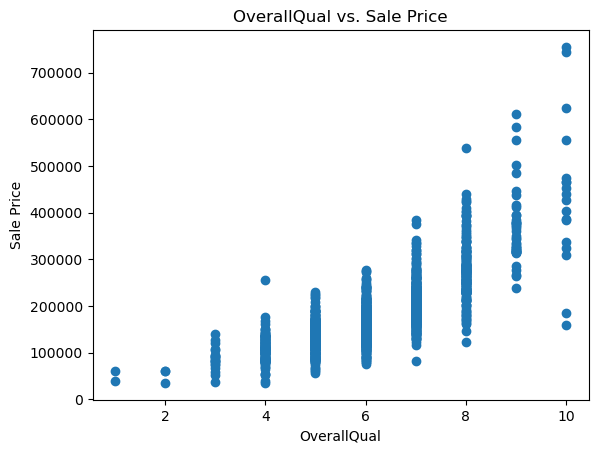

In [15]:
plt.scatter(x='OverallQual',y='SalePrice',data=train_df)
plt.xlabel('OverallQual')
plt.ylabel('Sale Price')
plt.title('OverallQual vs. Sale Price')
plt.show

In [16]:
#check  what arethe outliers
train_df.query('OverallQual==10')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


<function matplotlib.pyplot.show(close=None, block=None)>

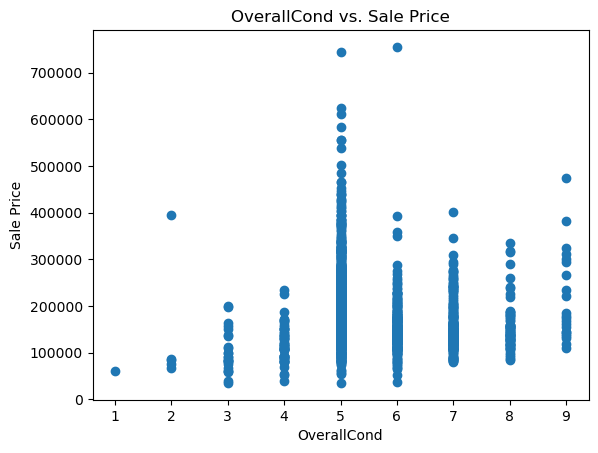

In [17]:
plt.scatter(x='OverallCond',y='SalePrice',data=train_df)
plt.xlabel('OverallCond')
plt.ylabel('Sale Price')
plt.title('OverallCond vs. Sale Price')
plt.show

In [18]:
train_df.query('OverallCond==2')
#379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [19]:
train_df.query('OverallCond==5 & SalePrice>700000')
#1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [20]:
train_df.query('OverallCond==6 & SalePrice>700000')
#692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


<function matplotlib.pyplot.show(close=None, block=None)>

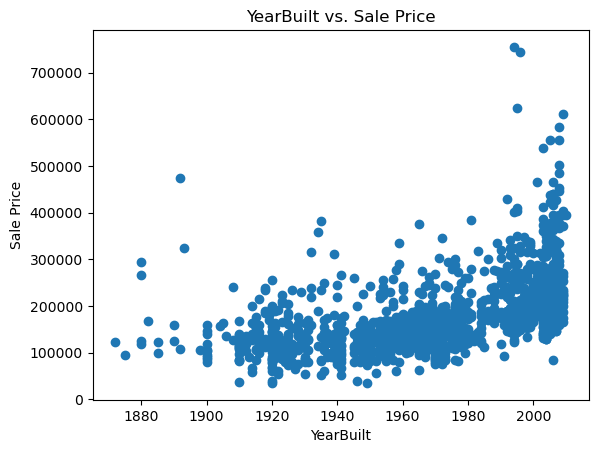

In [21]:
plt.scatter(x='YearBuilt',y='SalePrice',data=train_df)
plt.xlabel('YearBuilt')
plt.ylabel('Sale Price')
plt.title('YearBuilt vs. Sale Price')
plt.show

In [22]:
train_df.query('YearBuilt< 1900 & SalePrice>400000')
#186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


<function matplotlib.pyplot.show(close=None, block=None)>

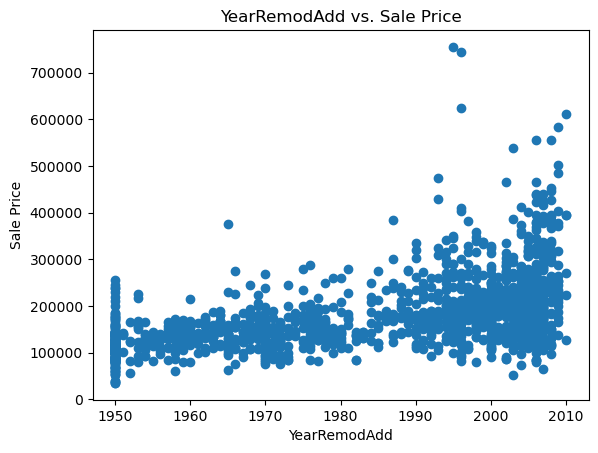

In [23]:
plt.scatter(x='YearRemodAdd',y='SalePrice',data=train_df)
plt.xlabel('YearRemodAdd')
plt.ylabel('Sale Price')
plt.title('YearRemodAdd vs. Sale Price')
plt.show

In [24]:
train_df.query('YearRemodAdd< 1970 & SalePrice>300000')
#314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


<function matplotlib.pyplot.show(close=None, block=None)>

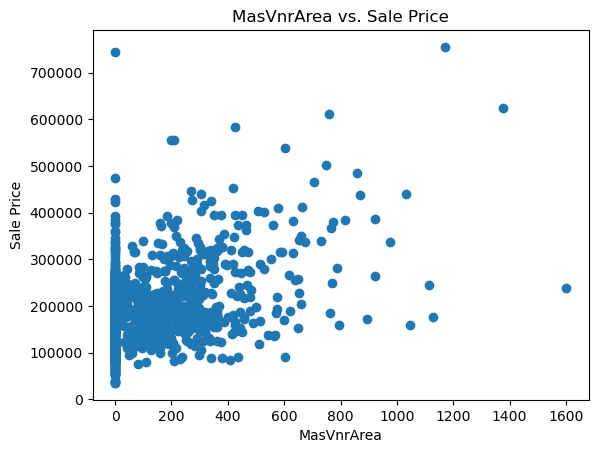

In [25]:
plt.scatter(x='MasVnrArea',y='SalePrice',data=train_df)
plt.xlabel('MasVnrArea')
plt.ylabel('Sale Price')
plt.title('MasVnrArea vs. Sale Price')
plt.show

In [26]:
#have many outliers
train_df.query('MasVnrArea>1500')
#298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


<function matplotlib.pyplot.show(close=None, block=None)>

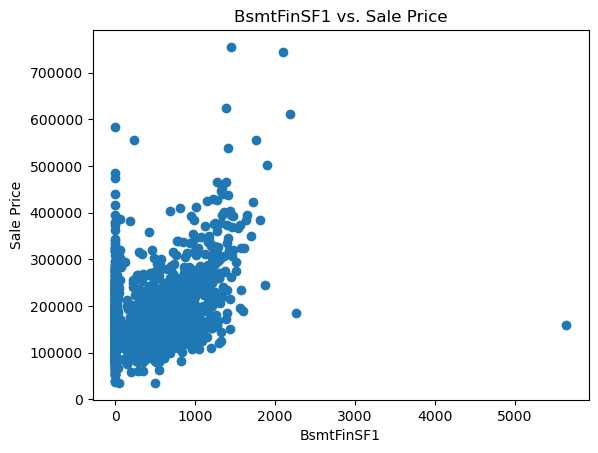

In [27]:
plt.scatter(x='BsmtFinSF1',y='SalePrice',data=train_df)
plt.xlabel('BsmtFinSF1')
plt.ylabel('Sale Price')
plt.title('BsmtFinSF1 vs. Sale Price')
plt.show

In [28]:
train_df.query('BsmtFinSF1>5000')
#1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<function matplotlib.pyplot.show(close=None, block=None)>

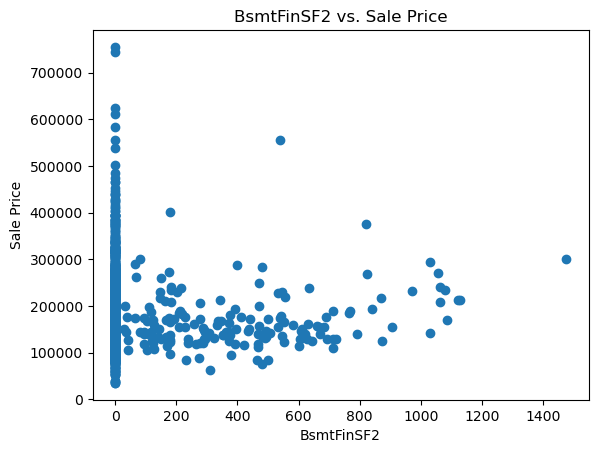

In [29]:
plt.scatter(x='BsmtFinSF2',y='SalePrice',data=train_df)
plt.xlabel('BsmtFinSF2')
plt.ylabel('Sale Price')
plt.title('BsmtFinSF2 vs. Sale Price')
plt.show

In [30]:
train_df.query('BsmtFinSF2>400 & SalePrice>500000')
#441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


<function matplotlib.pyplot.show(close=None, block=None)>

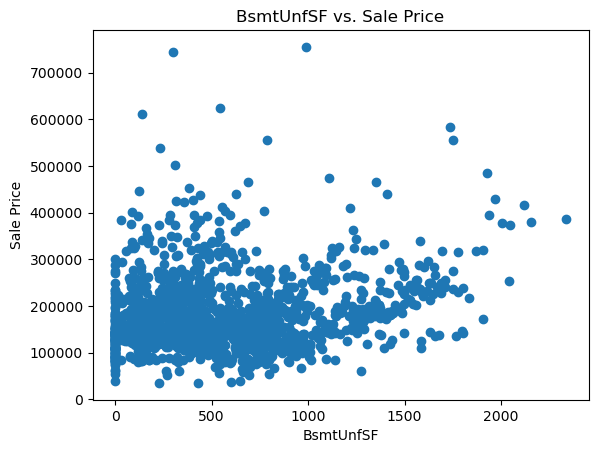

In [31]:
plt.scatter(x='BsmtUnfSF',y='SalePrice',data=train_df)
plt.xlabel('BsmtUnfSF')
plt.ylabel('Sale Price')
plt.title('BsmtUnfSF vs. Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

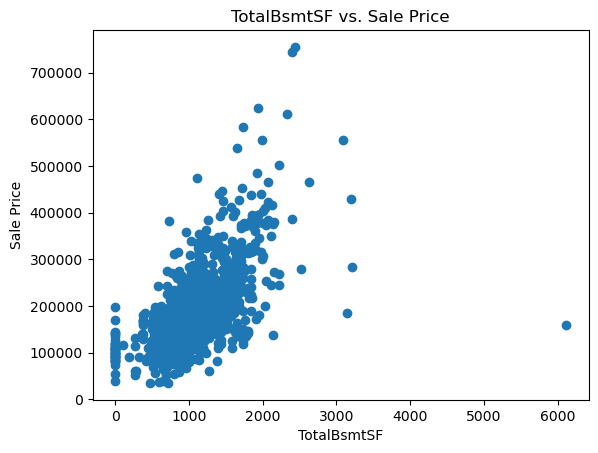

In [32]:
plt.scatter(x='TotalBsmtSF',y='SalePrice',data=train_df)
plt.xlabel('TotalBsmtSF')
plt.ylabel('Sale Price')
plt.title('TotalBsmtSF vs. Sale Price')
plt.show

In [33]:
train_df.query('TotalBsmtSF>5000')
#1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<function matplotlib.pyplot.show(close=None, block=None)>

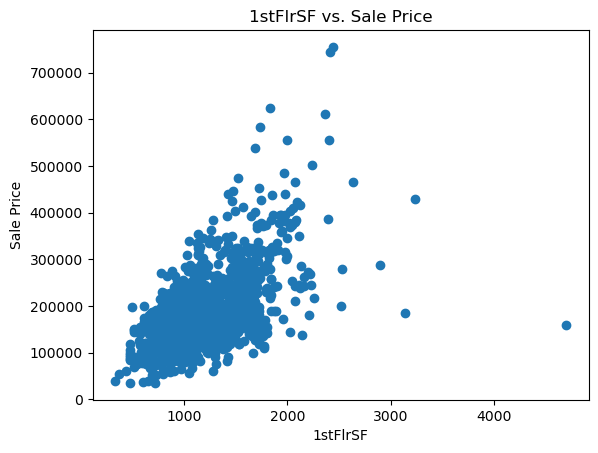

In [34]:
plt.scatter(x='1stFlrSF',y='SalePrice',data=train_df)
plt.xlabel('1stFlrSF')
plt.ylabel('Sale Price')
plt.title('1stFlrSF vs. Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

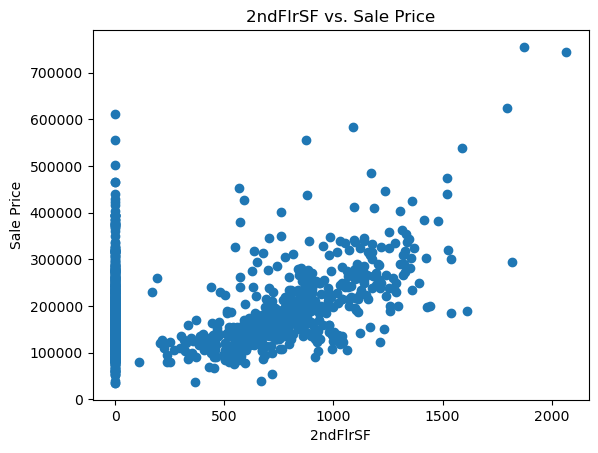

In [35]:
plt.scatter(x='2ndFlrSF',y='SalePrice',data=train_df)
plt.xlabel('2ndFlrSF')
plt.ylabel('Sale Price')
plt.title('2ndFlrSF vs. Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

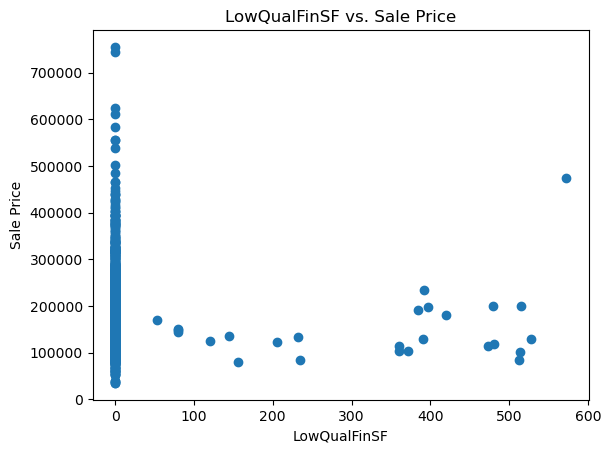

In [36]:
plt.scatter(x='LowQualFinSF',y='SalePrice',data=train_df)
plt.xlabel('LowQualFinSF')
plt.ylabel('Sale Price')
plt.title('LowQualFinSF vs. Sale Price')
plt.show

In [37]:
train_df.query('LowQualFinSF>500')
#118

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
170,171,50,RM,NaN,12358,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,128500
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000
1009,1010,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102000


<function matplotlib.pyplot.show(close=None, block=None)>

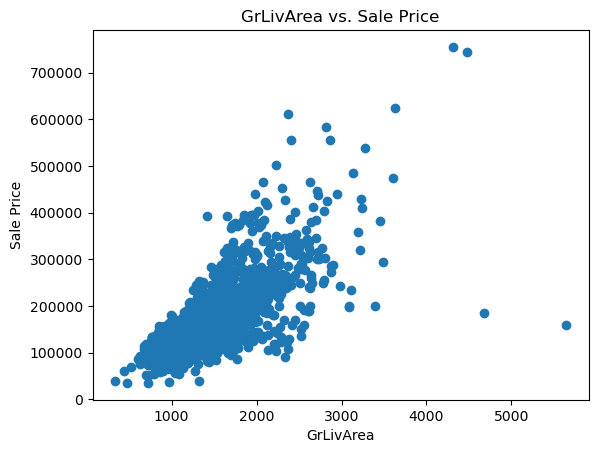

In [38]:
plt.scatter(x='GrLivArea',y='SalePrice',data=train_df)
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.title('GrLivArea vs. Sale Price')
plt.show

In [39]:
train_df.query('GrLivArea>4400')
#524,1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<function matplotlib.pyplot.show(close=None, block=None)>

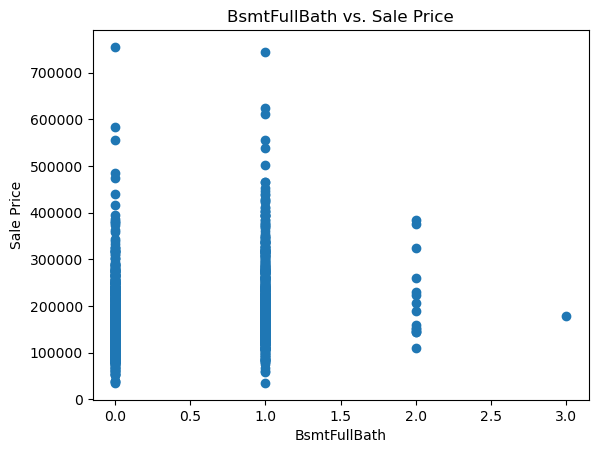

In [40]:
plt.scatter(x='BsmtFullBath',y='SalePrice',data=train_df)
plt.xlabel('BsmtFullBath')
plt.ylabel('Sale Price')
plt.title('BsmtFullBath vs. Sale Price')
plt.show

In [41]:
train_df.query('BsmtFullBath==3')
#739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


<function matplotlib.pyplot.show(close=None, block=None)>

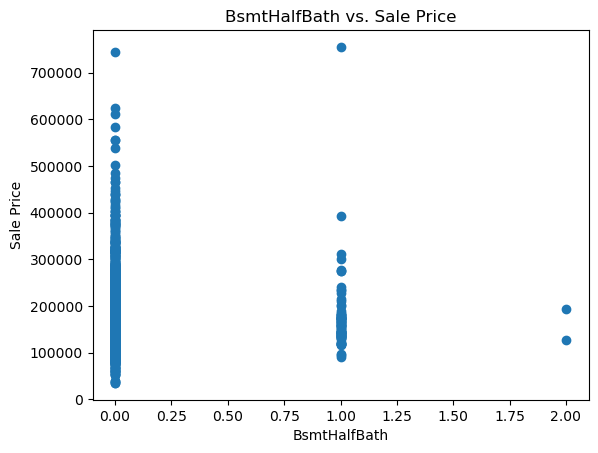

In [42]:
plt.scatter(x='BsmtHalfBath',y='SalePrice',data=train_df)
plt.xlabel('BsmtHalfBath')
plt.ylabel('Sale Price')
plt.title('BsmtHalfBath vs. Sale Price')
plt.show

In [43]:
#check the zscore
stats.zscore(train_df['BsmtHalfBath']).unique()

array([-0.24106104,  3.94880935,  8.13867973])

In [44]:
train_df.query('BsmtHalfBath==2')
#598,955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


<function matplotlib.pyplot.show(close=None, block=None)>

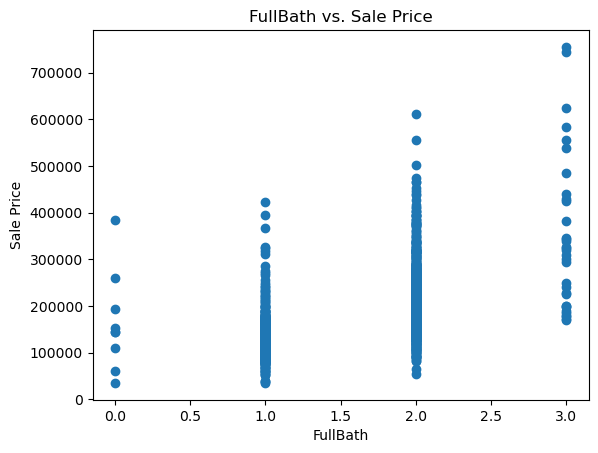

In [45]:
plt.scatter(x='FullBath',y='SalePrice',data=train_df)
plt.xlabel('FullBath')
plt.ylabel('Sale Price')
plt.title('FullBath vs. Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

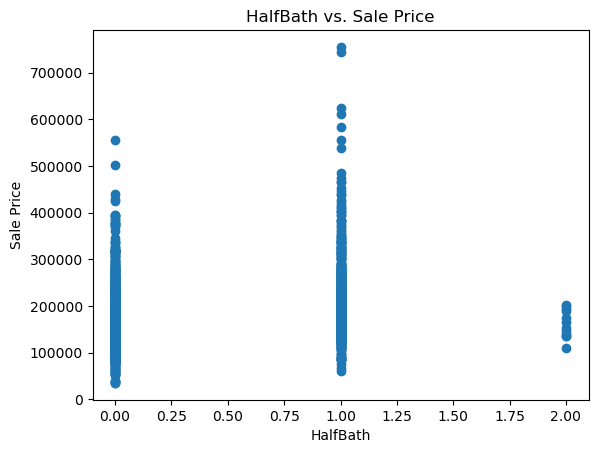

In [46]:
plt.scatter(x='HalfBath',y='SalePrice',data=train_df)
plt.xlabel('HalfBath')
plt.ylabel('Sale Price')
plt.title('HalfBath vs. Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

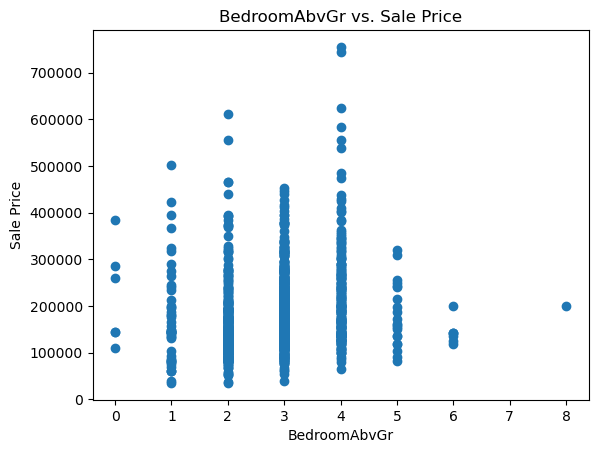

In [47]:
plt.scatter(x='BedroomAbvGr',y='SalePrice',data=train_df)
plt.xlabel('BedroomAbvGr')
plt.ylabel('Sale Price')
plt.title('BedroomAbvGr vs. Sale Price')
plt.show

In [48]:
train_df.query('BedroomAbvGr==8')
#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


<function matplotlib.pyplot.show(close=None, block=None)>

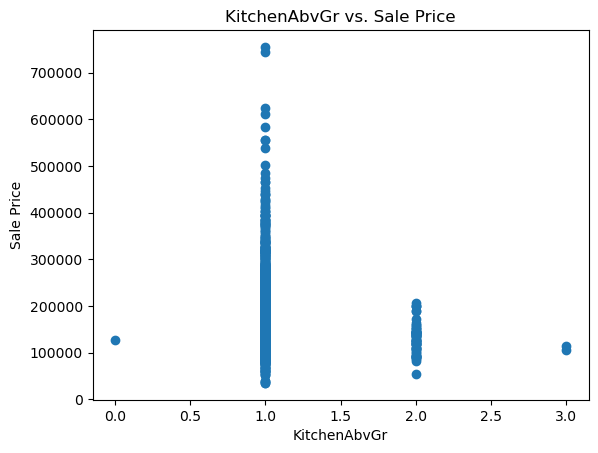

In [49]:
plt.scatter(x='KitchenAbvGr',y='SalePrice',data=train_df)
plt.xlabel('KitchenAbvGr')
plt.ylabel('Sale Price')
plt.title('KitchenAbvGr vs. Sale Price')
plt.show

In [50]:
train_df.query('BedroomAbvGr==3')
#49,810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000


<function matplotlib.pyplot.show(close=None, block=None)>

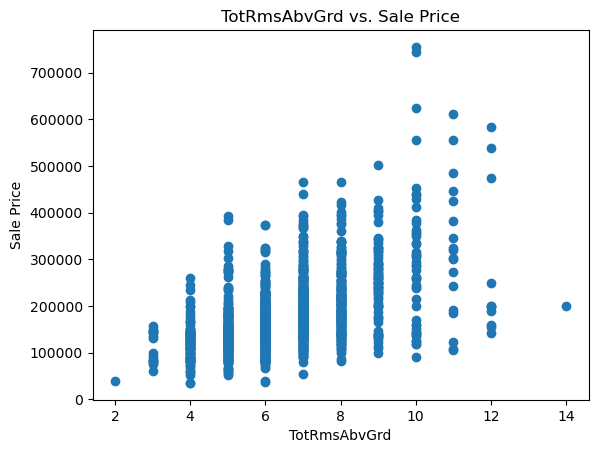

In [51]:
plt.scatter(x='TotRmsAbvGrd',y='SalePrice',data=train_df)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Sale Price')
plt.title('TotRmsAbvGrd vs. Sale Price')
plt.show

In [52]:
train_df.query('TotRmsAbvGrd==14')
#636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


<function matplotlib.pyplot.show(close=None, block=None)>

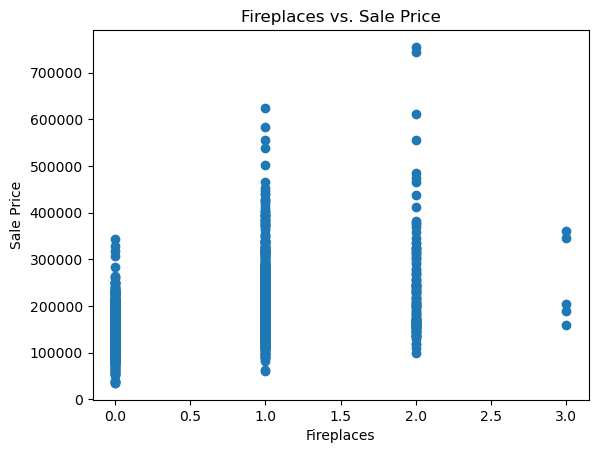

In [53]:
plt.scatter(x='Fireplaces',y='SalePrice',data=train_df)
plt.xlabel('Fireplaces')
plt.ylabel('Sale Price')
plt.title('Fireplaces vs. Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

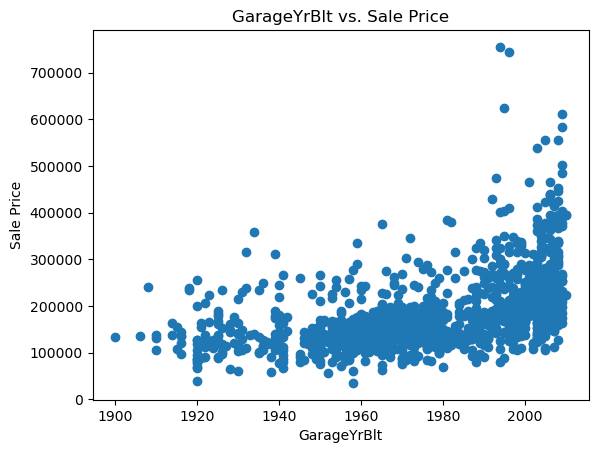

In [54]:
plt.scatter(x='GarageYrBlt',y='SalePrice',data=train_df)
plt.xlabel('GarageYrBlt')
plt.ylabel('Sale Price')
plt.title('GarageYrBlt vs. Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

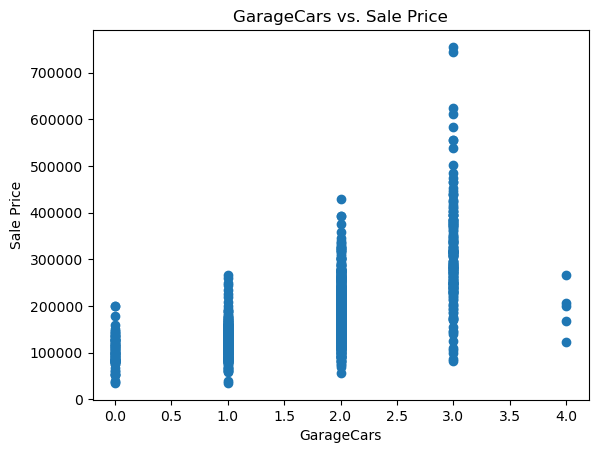

In [55]:
plt.scatter(x='GarageCars',y='SalePrice',data=train_df)
plt.xlabel('GarageCars')
plt.ylabel('Sale Price')
plt.title('GarageCars vs. Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

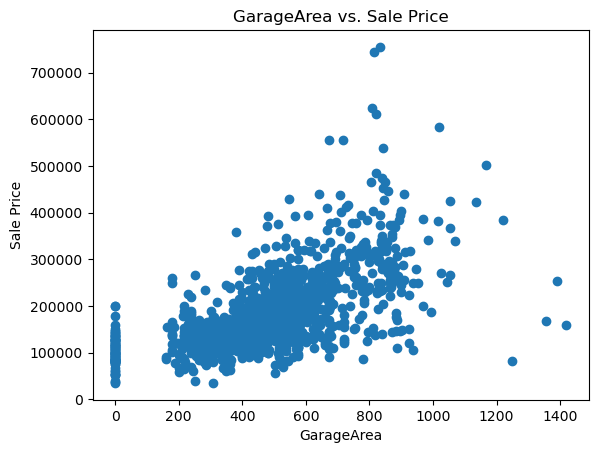

In [56]:
plt.scatter(x='GarageArea',y='SalePrice',data=train_df)
plt.xlabel('GarageArea')
plt.ylabel('Sale Price')
plt.title('GarageArea vs. Sale Price')
plt.show

In [57]:
train_df.query('GarageArea>1200')
#1062,1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


<function matplotlib.pyplot.show(close=None, block=None)>

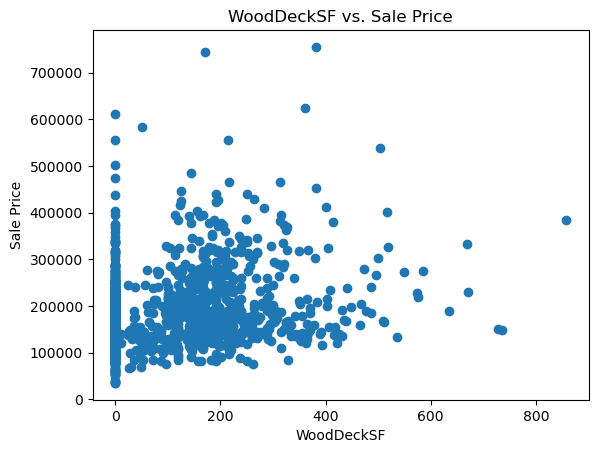

In [58]:
plt.scatter(x='WoodDeckSF',y='SalePrice',data=train_df)
plt.xlabel('WoodDeckSF')
plt.ylabel('Sale Price')
plt.title('WoodDeckSF vs. Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

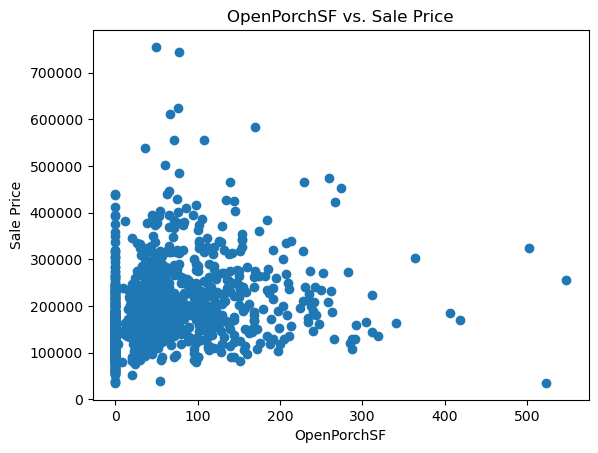

In [59]:
plt.scatter(x='OpenPorchSF',y='SalePrice',data=train_df)
plt.xlabel('OpenPorchSF')
plt.ylabel('Sale Price')
plt.title('OpenPorchSF vs. Sale Price')
plt.show

In [60]:
train_df.query('OpenPorchSF>500')
#496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


<function matplotlib.pyplot.show(close=None, block=None)>

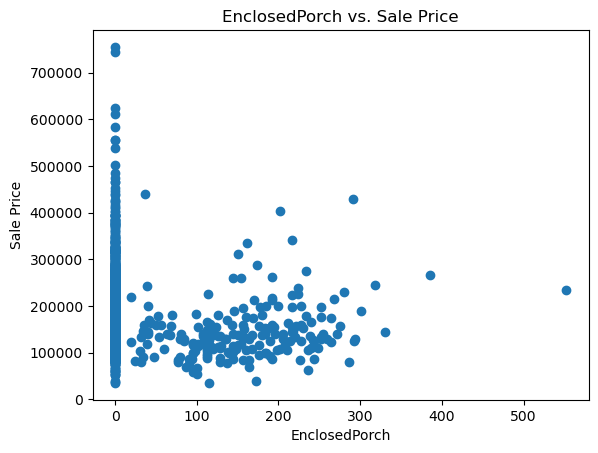

In [61]:
plt.scatter(x='EnclosedPorch',y='SalePrice',data=train_df)
plt.xlabel('EnclosedPorch')
plt.ylabel('Sale Price')
plt.title('EnclosedPorch vs. Sale Price')
plt.show

In [62]:
train_df.query('EnclosedPorch>500')
#198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


<function matplotlib.pyplot.show(close=None, block=None)>

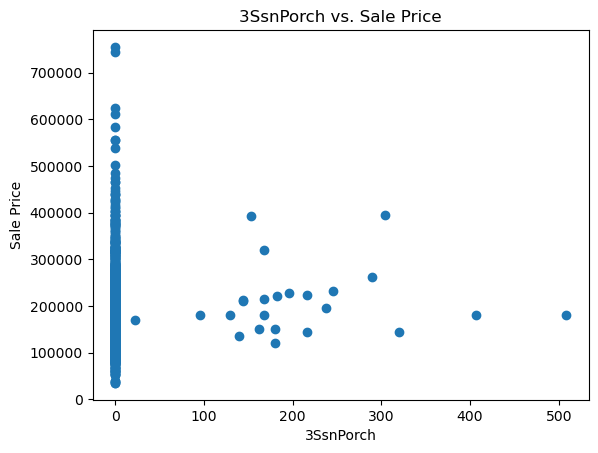

In [63]:
plt.scatter(x='3SsnPorch',y='SalePrice',data=train_df)
plt.xlabel('3SsnPorch')
plt.ylabel('Sale Price')
plt.title('3SsnPorch vs. Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

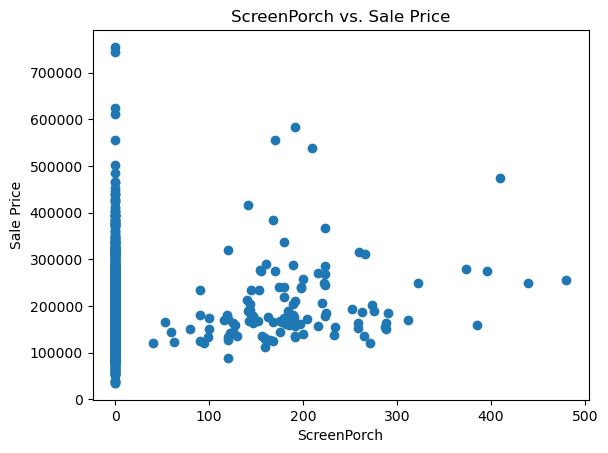

In [64]:
plt.scatter(x='ScreenPorch',y='SalePrice',data=train_df)
plt.xlabel('ScreenPorch')
plt.ylabel('Sale Price')
plt.title('ScreenPorch vs. Sale Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

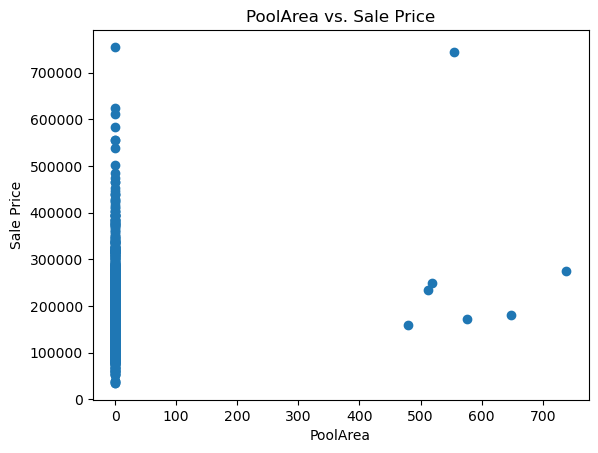

In [65]:
plt.scatter(x='PoolArea',y='SalePrice',data=train_df)
plt.xlabel('PoolArea')
plt.ylabel('Sale Price')
plt.title('PoolArea vs. Sale Price')
plt.show

In [66]:
values=[598,955,935,1299,250,314,336,707,379,1183,692,186,441,186,524,739,598,955,636,1062,1191,496,198]

In [67]:
train_df=train_df[train_df.Id.isin(values)==False]

In [68]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1436
MiscFeature,1389
Alley,1350
Fence,1163
MasVnrType,862
FireplaceQu,685
LotFrontage,255
GarageYrBlt,77
GarageCond,77
GarageType,77


In [69]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [70]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [71]:
train_df['Alley'].fillna('No',inplace=True)
test_df['Alley'].fillna('No',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\821176631.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\821176631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Alley'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\i

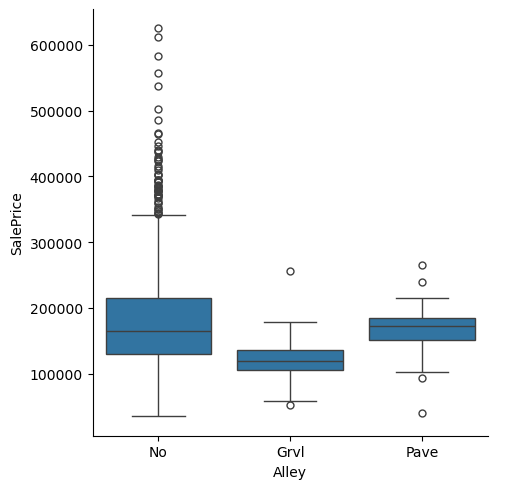

In [72]:
#scatter plot
sns.catplot(data=train_df,x="Alley",y="SalePrice",kind="box")

In [73]:
train_df.query('Alley=="Grvl"').count()

Id               50
MSSubClass       50
MSZoning         50
LotFrontage      47
LotArea          50
                 ..
MoSold           50
YrSold           50
SaleType         50
SaleCondition    50
SalePrice        50
Length: 81, dtype: int64

In [74]:
train_df.query('Alley=="Pave"').count()

Id               40
MSSubClass       40
MSZoning         40
LotFrontage      38
LotArea          40
                 ..
MoSold           40
YrSold           40
SaleType         40
SaleCondition    40
SalePrice        40
Length: 81, dtype: int64

In [75]:
train_df['Fence'].fillna('No',inplace=True)
test_df['Fence'].fillna('No',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\4003207468.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fence'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\4003207468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Fence'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp

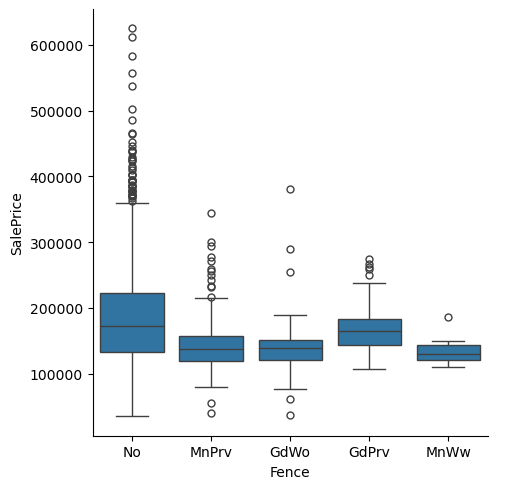

In [76]:
#scatter plot
sns.catplot(data=train_df,x="Fence",y="SalePrice",kind="box")

In [77]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [78]:
train_df['MasVnrType'].fillna('No',inplace=True)
test_df['MasVnrType'].fillna('No',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\3372288915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\3372288915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['MasVnrType'].fillna('No',inplace=True)
C:\Users\hirun\AppData\

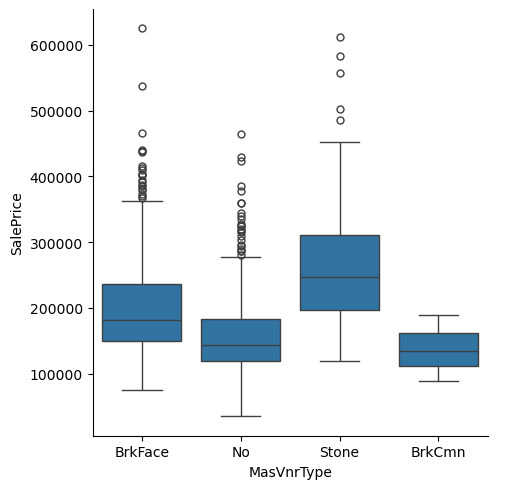

In [79]:
#scatter plot
sns.catplot(data=train_df,x="MasVnrType",y="SalePrice",kind="box")

In [80]:
train_df['MasVnrType'].fillna(0,inplace=True)
test_df['MasVnrType'].fillna(0,inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1046317537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['MasVnrType'].fillna(0,inplace=True)


In [81]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [82]:
train_df['FireplaceQu'].fillna('No',inplace=True)
test_df['FireplaceQu'].fillna('No',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1670826699.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1670826699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['FireplaceQu'].fillna('No',inplace=True)
C:\Users\hirun\AppDat

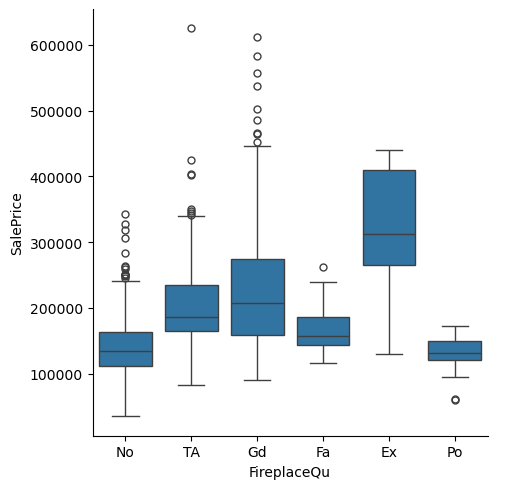

In [83]:
#scatter plot
sns.catplot(data=train_df,x="FireplaceQu",y="SalePrice",kind="box")

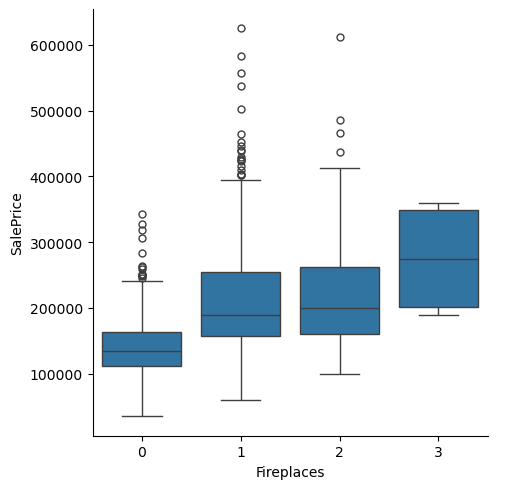

In [84]:
#scatter plot
sns.catplot(data=train_df,x="Fireplaces",y="SalePrice",kind="box")

In [85]:
train_df['LotFrontage'].fillna('No',inplace=True)
test_df['LotFrontage'].fillna('No',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1308018015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1308018015.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_df['LotFrontage'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\T

In [86]:

##train_df['GarageYrBlt'].corr(train_df)['YearBuilt']
print(train_df.dtypes)

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object


In [87]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [88]:
train_df['GarageCond'].fillna('No',inplace=True)
test_df['GarageCond'].fillna('No',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1859802868.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageCond'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1859802868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GarageCond'].fillna('No',inplace=True)
C:\Users\hirun\AppData\

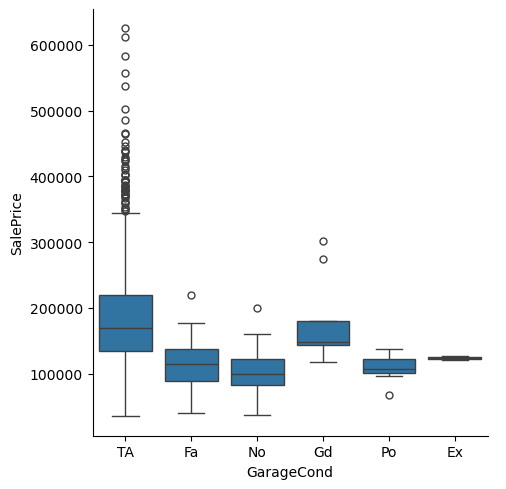

In [89]:
#scatter plot
sns.catplot(data=train_df,x="GarageCond",y="SalePrice",kind="box")

In [90]:
train_df['GarageType'].fillna('No',inplace=True)
test_df['GarageType'].fillna('No',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\2396956490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageType'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\2396956490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GarageType'].fillna('No',inplace=True)
C:\Users\hirun\AppData\

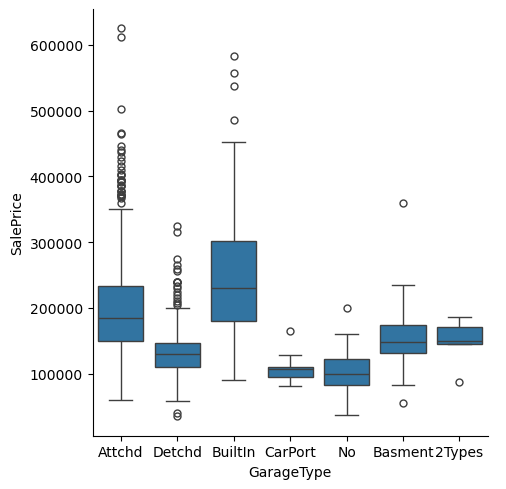

In [91]:
#scatter plot
sns.catplot(data=train_df,x="GarageType",y="SalePrice",kind="box")

In [92]:
train_df['GarageFinish'].fillna('No',inplace=True)
test_df['GarageFinish'].fillna('No',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1995105470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageFinish'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1995105470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GarageFinish'].fillna('No',inplace=True)
C:\Users\hirun\AppD

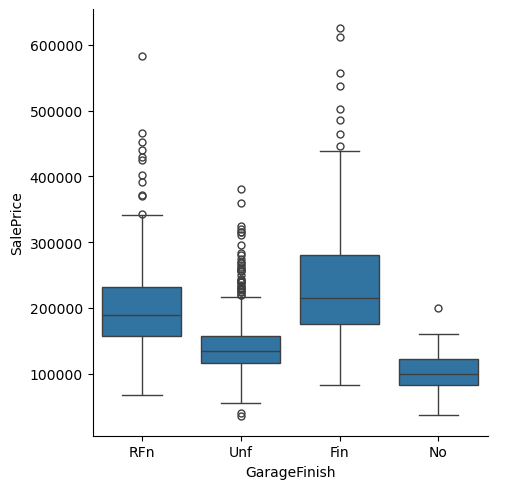

In [93]:
#scatter plot
sns.catplot(data=train_df,x="GarageFinish",y="SalePrice",kind="box")

In [94]:
train_df['GarageQual'].fillna('No',inplace=True)
test_df['GarageQual'].fillna('No',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\4046941688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageQual'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\4046941688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GarageQual'].fillna('No',inplace=True)
C:\Users\hirun\AppData\

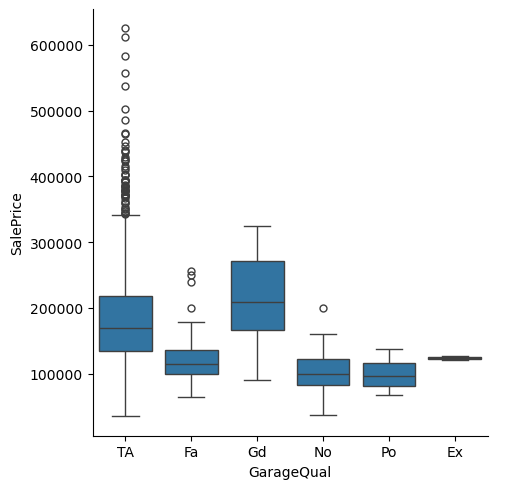

In [95]:
#scatter plot
sns.catplot(data=train_df,x="GarageQual",y="SalePrice",kind="box")

In [96]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [97]:
train_df['BsmtFinType2'].fillna('Unf',inplace=True)
test_df['BsmtFinType2'].fillna('Unf',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1235120148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType2'].fillna('Unf',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1235120148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtFinType2'].fillna('Unf',inplace=True)
C:\Users\hirun\Ap

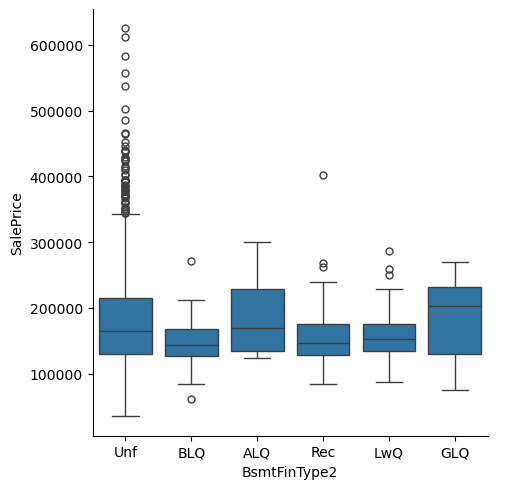

In [98]:
#scatter plot
sns.catplot(data=train_df,x="BsmtFinType2",y="SalePrice",kind="box")

In [99]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [100]:
train_df['BsmtExposure'].fillna('No',inplace=True)
test_df['BsmtExposure'].fillna('No',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\2134669793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtExposure'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\2134669793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtExposure'].fillna('No',inplace=True)
C:\Users\hirun\AppD

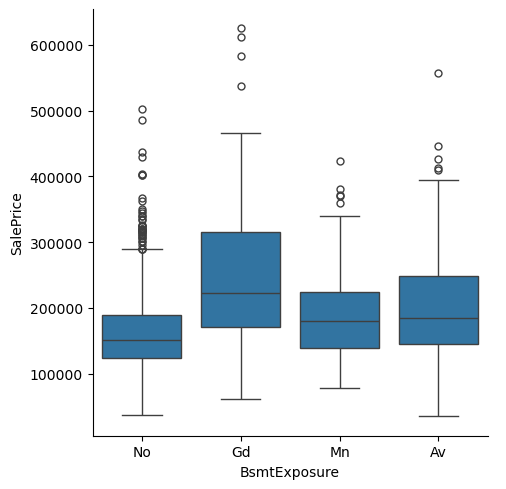

In [101]:
#scatter plot
sns.catplot(data=train_df,x="BsmtExposure",y="SalePrice",kind="box")

In [102]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [103]:
train_df['BsmtQual'].fillna('No',inplace=True)
test_df['BsmtQual'].fillna('No',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\3798412020.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtQual'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\3798412020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtQual'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Loca

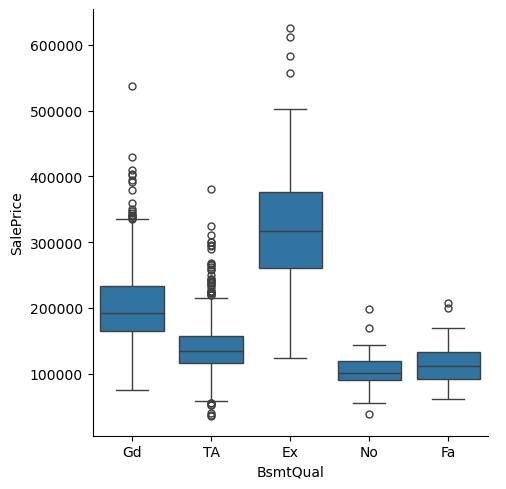

In [104]:
#scatter plot
sns.catplot(data=train_df,x="BsmtQual",y="SalePrice",kind="box")

In [105]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [106]:
train_df['BsmtCond'].fillna('No',inplace=True)
test_df['BsmtCond'].fillna('No',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\2042814062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtCond'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\2042814062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtCond'].fillna('No',inplace=True)
C:\Users\hirun\AppData\Loca

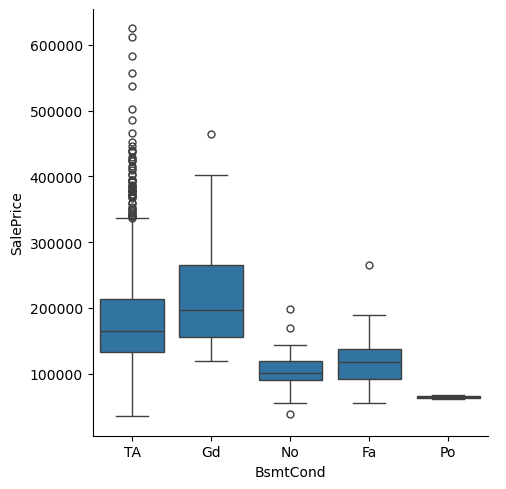

In [107]:
#scatter plot
sns.catplot(data=train_df,x="BsmtCond",y="SalePrice",kind="box")

In [108]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [109]:
train_df['BsmtFinType1'].fillna('Unf',inplace=True)
test_df['BsmtFinType1'].fillna('Unf',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1507099269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType1'].fillna('Unf',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\1507099269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtFinType1'].fillna('Unf',inplace=True)
C:\Users\hirun\Ap

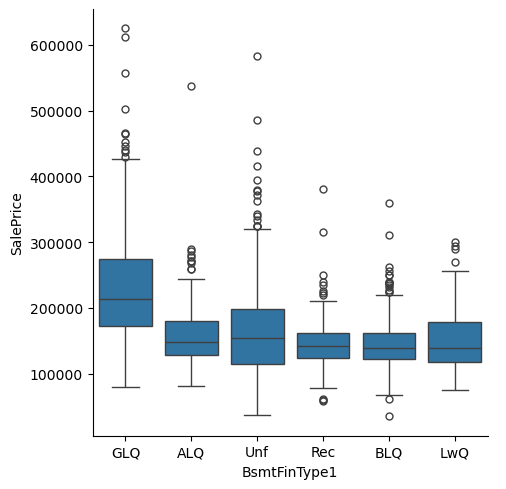

In [110]:
#scatter plot
sns.catplot(data=train_df,x="BsmtFinType1",y="SalePrice",kind="box")

In [111]:
train_df['MasVnrArea'].fillna(0,inplace=True)
test_df['MasVnrArea'].fillna(0,inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\2498760478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0,inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\2498760478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['MasVnrArea'].fillna(0,inplace=True)
C:\Users\hirun\AppData\Local\

In [112]:
train_df['Electrical'].fillna('SBrkr',inplace=True)
test_df['Electrical'].fillna('SBrkr',inplace=True)

C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\2621022521.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Electrical'].fillna('SBrkr',inplace=True)
C:\Users\hirun\AppData\Local\Temp\ipykernel_5068\2621022521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Electrical'].fillna('SBrkr',inplace=True)
C:\Users\hirun\Ap

In [113]:
train_df
#train_df=train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
#test_df=test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,...,0,NaN,No,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,...,0,NaN,No,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,...,0,NaN,No,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,...,0,NaN,No,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,...,0,NaN,No,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,...,0,NaN,No,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,...,0,NaN,No,NaN,0,4,2010,WD,Normal,142125


In [114]:
# For train_df
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'], errors='ignore')

# For test_df
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'], errors='ignore')



In [115]:
#feature engineering
train_df['houseage']=train_df['YrSold']-train_df['YearBuilt']
test_df['houseage']=test_df['YrSold']-test_df['YearBuilt']

In [116]:
train_df['houseremodelage']=train_df['YrSold']-train_df['YearRemodAdd']
test_df['houseremodelage']=test_df['YrSold']-test_df['YearRemodAdd']

In [117]:
train_df['totalsf']=train_df['1stFlrSF']+train_df['2ndFlrSF']+train_df['BsmtFinSF1']+train_df['BsmtFinSF2']
test_df['totalsf']=test_df['1stFlrSF']+test_df['2ndFlrSF']+test_df['BsmtFinSF1']+test_df['BsmtFinSF2']

In [118]:
train_df['totalarea']=train_df['GrLivArea']+train_df['TotalBsmtSF']
test_df['totalarea']=test_df['GrLivArea']+test_df['TotalBsmtSF']

In [119]:
train_df['totalbaths']=train_df['BsmtFullBath']+train_df['FullBath']+0.5*(train_df['BsmtHalfBath']+train_df['HalfBath'])
test_df['totalbaths']=test_df['BsmtFullBath']+test_df['FullBath']+0.5*(test_df['BsmtHalfBath']+test_df['HalfBath'])

In [120]:
train_df['totalporchsf']=train_df['OpenPorchSF']+train_df['3SsnPorch']+train_df['EnclosedPorch']+train_df['ScreenPorch']
test_df['totalporchsf']=test_df['OpenPorchSF']+test_df['3SsnPorch']+test_df['EnclosedPorch']+test_df['ScreenPorch']

In [121]:
# For train_df
train_df = train_df.drop(columns=['Id','YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch'])

# For test_df
test_df = test_df.drop(columns=['Id','YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch'])

<Axes: >

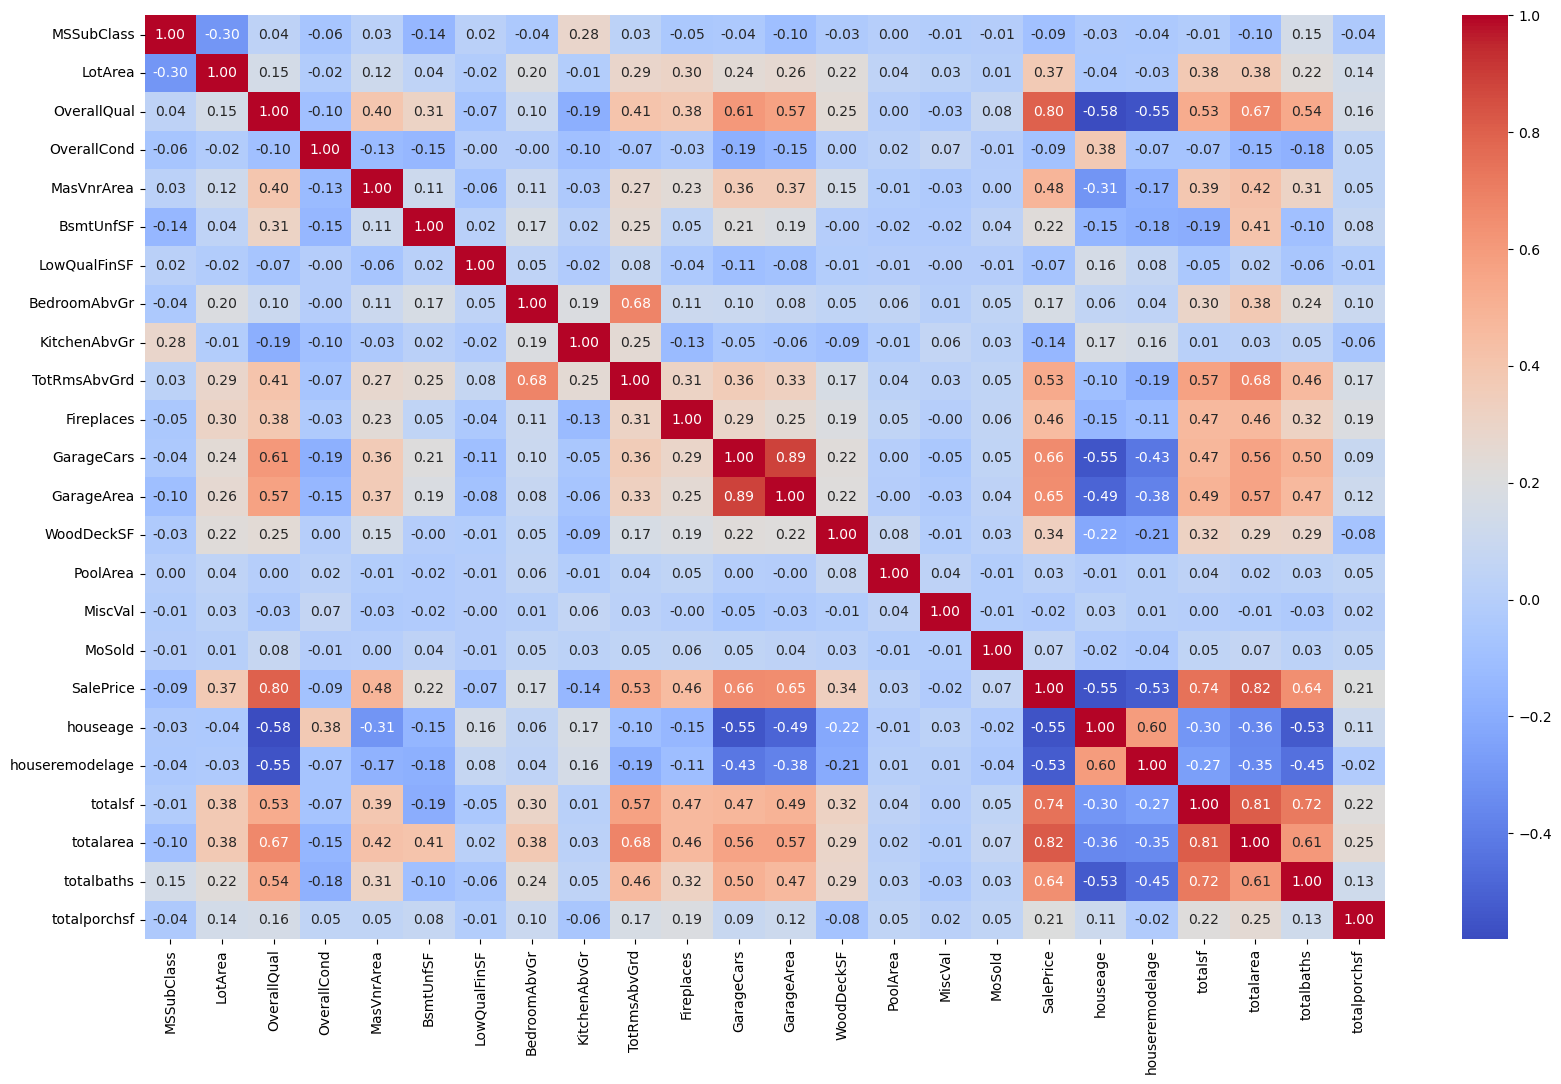

In [122]:
#correlation matrix
correlation_matrix=train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')

In [123]:
#drop garage area or garage cars
train_df = train_df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

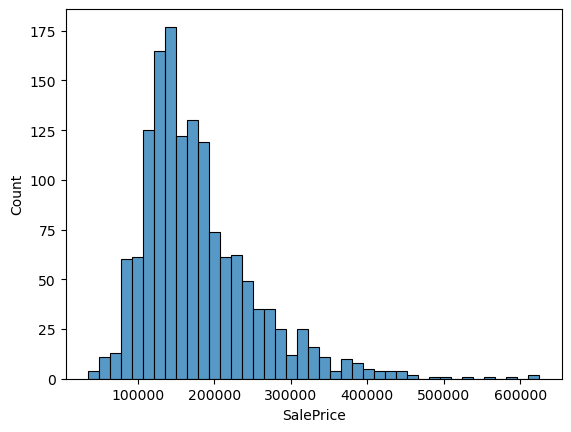

In [124]:
#histrogram
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [125]:
train_df['SalePrice']=np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

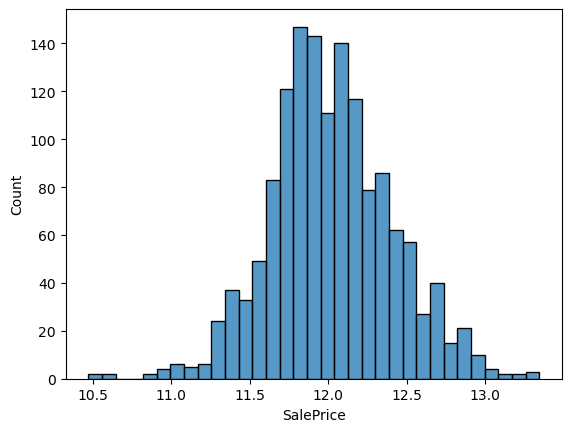

In [126]:
#histogram after log1p
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [127]:
#find the objects
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
LotFrontage      object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [128]:
#filter int and flots (numeric)
train_df.dtypes[train_df.dtypes!='object']

MSSubClass           int64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
WoodDeckSF           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
houseage             int64
houseremodelage      int64
totalsf              int64
totalarea            int64
totalbaths         float64
totalporchsf         int64
dtype: object